In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Dataset Preparation
Read the dataset and clean datas. Remove outliers and transform features.
Create target with multi ouptu regressor problem.

In [3]:
# define constant & read the dataset
FOLDER = 'dataset/'
FILENAME = 'game_odd_rank_fifa.csv'

df = pd.read_csv(f'{FOLDER}{FILENAME}')
df.shape

(4371, 25)

In [4]:
df.columns.tolist()
df['matchdate']=pd.to_datetime(df['matchday'], format='%d.%m.%Y')
data=df.drop(['oddsportal','betexplorer','matchday','bet_won','period','matchdate'],axis=1)
data.loc[data.query('competition.str.contains("world-cup")', engine='python').index,'set']=0
data.set.fillna(1, inplace=True)


In [6]:
data.sample(8)

,home_team,away_team,correct_score,1N2_1,1N2_N,1N2_2,location,season,competition,target,odd_win,best_odd_won,home_team_rank_FIFA,away_team_rank_FIFA,home_score,away_score,diff_score,home_points,away_points,set
3172,Hong Kong,Macau,2:0,1.08,9.63,20.00,world,2015,friendly-international,0.0,1.08,True,155.250000,187.666667,2.0,0.0,2.0,3.0,0.0,1.0
3916,Botswana,Lesotho,1:0,1.95,3.04,4.35,world,2018,friendly-international,0.0,1.95,True,143.666667,146.750000,1.0,0.0,1.0,3.0,0.0,1.0
2835,Brazil,Portugal,3:1,1.63,3.84,5.13,world,2013,friendly-international,0.0,1.63,True,14.250000,7.083333,3.0,1.0,2.0,3.0,0.0,1.0
3106,Albania,Malta,2:0,1.32,4.64,9.17,world,2014,friendly-international,0.0,1.32,True,59.083333,140.750000,2.0,0.0,2.0,3.0,0.0,1.0
1008,Hungary,Argentina,1:2,5.79,3.53,1.51,world,2005,friendly-international,2.0,1.51,True,67.333333,3.083333,1.0,2.0,1.0,0.0,3.0,1.0
3096,Ukraine,Niger,2:1,1.12,7.95,18.10,world,2014,friendly-international,0.0,1.12,True,20.166667,75.166667,2.0,1.0,1.0,3.0,0.0,1.0
3382,Northern Ireland,Croatia,0:3,4.01,3.21,2.03,world,2016,friendly-international,2.0,2.03,True,29.166667,17.916667,0.0,3.0,3.0,0.0,3.0,1.0
1306,Iraq,North Korea,1:0,3.45,3.33,1.93,world,2007,friendly-international,0.0,3.45,False,75.166667,130.250000,1.0,0.0,1.0,3.0,0.0,1.0


In [10]:
data.iloc[100:101,:].T

,100
home_team,Czech Republic
away_team,Italy
correct_score,0:2
1N2_1,3.95
1N2_N,3.15
1N2_2,1.95
location,world
season,2006
competition,world-cup
target,2


In [ ]:
data.dtypes

home_team               object
away_team               object
correct_score           object
1N2_1                  float64
1N2_N                  float64
1N2_2                  float64
location                object
season                   int64
competition             object
target                 float64
odd_win                float64
best_odd_won              bool
home_team_rank_FIFA    float64
away_team_rank_FIFA    float64
home_score             float64
away_score             float64
diff_score             float64
home_points            float64
away_points            float64
set                    float64
dtype: object

In [ ]:
data.drop('competition', axis=1, inplace=True)
dataset=pd.get_dummies(data, columns=['home_team','away_team','correct_score','location'])

In [ ]:
trainset = dataset.query('set == 1')
testset = dataset.query('set == 0')

In [ ]:
trainset.shape, testset.shape

((4114, 441), (257, 441))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train_X = trainset.drop(['home_score','away_score'],axis=1).values
train_y = trainset[['home_score', 'away_score']].values

scaler = StandardScaler()
train_X=scaler.fit_transform(train_X)

test_X = testset.drop(['home_score','away_score'],axis=1).values
test_y = testset[['home_score', 'away_score']].values
test_X = scaler.transform(test_X)


[[0 1]] [[2 0]]
y1 MSE:0.0002
y2 MSE:0.0006


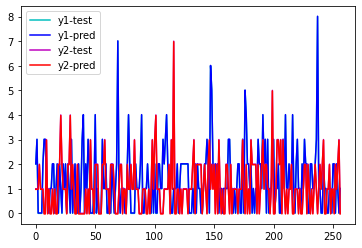

[[0 1]] [[1 1]]
y1 MSE:0.6786
y2 MSE:0.6954


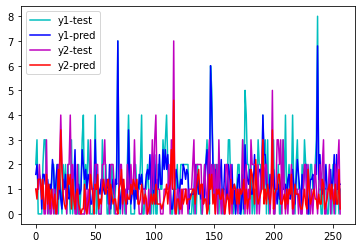

[[0 1]] [[2 1]]
y1 MSE:0.0000
y2 MSE:0.0000
Model feature importances [0.00000000e+00 5.38002628e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.58668418e-05 2.94031688e-01 6.21691925e-04 3.44592508e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.38002628e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

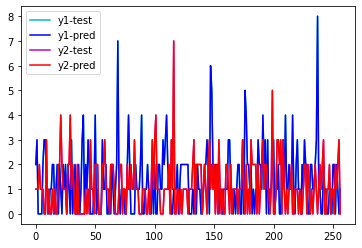

In [ ]:
def fit_a_model(model):
    model.fit(train_X, train_y)
    yhat=model.predict(test_X)    
    print(train_y[:1].astype(int), yhat[:1].astype(int))   
    print("y1 MSE:%.4f" % mean_squared_error(test_y[:,0], yhat[:,0]))
    print("y2 MSE:%.4f" % mean_squared_error(test_y[:,1], yhat[:,1]))    
    try:
        print(f'Model feature importances {model.feature_importances_}')
    except:
        pass
    x_ax = range(len(test_X))
    plt.plot(x_ax, test_y[:,0], label="y1-test", color='c')
    plt.plot(x_ax, yhat[:,0], label="y1-pred", color='b')
    plt.plot(x_ax, test_y[:,1], label="y2-test", color='m')
    plt.plot(x_ax, yhat[:,1], label="y2-pred", color='r')
    plt.legend()
    plt.show()

# fit a Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
fit_a_model(model)    

knn = KNeighborsRegressor()
fit_a_model(knn)

dt = DecisionTreeRegressor()
fit_a_model(dt)

In [ ]:
data

,home_team,away_team,correct_score,1N2_1,1N2_N,1N2_2,location,season,target,odd_win,best_odd_won,home_team_rank_FIFA,away_team_rank_FIFA,home_score,away_score,diff_score,home_points,away_points,set
0,Barbados,Nicaragua,0:1,3.74,3.66,1.78,north-central-america,2020,2.0,1.78,True,163.000,138.500,0.0,1.0,1.0,0.0,3.0,1.0
1,Dominican Republic,Bermuda,1:3,1.89,3.46,3.45,north-central-america,2020,2.0,3.45,False,155.125,171.250,1.0,3.0,2.0,0.0,3.0,1.0
2,El Salvador,Jamaica,2:0,2.40,2.92,2.87,north-central-america,2020,0.0,2.40,True,70.500,50.500,2.0,0.0,2.0,3.0,0.0,1.0
3,Haiti,Cuba,2:1,1.56,3.82,4.85,north-central-america,2020,0.0,1.56,True,91.625,177.125,2.0,1.0,1.0,3.0,0.0,1.0
4,Puerto Rico,Grenada,0:2,2.24,3.43,2.66,north-central-america,2020,2.0,2.66,False,179.375,166.125,0.0,2.0,2.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,Canada,Iceland,0:1,2.82,3.19,2.48,world,2020,2.0,2.48,True,72.625,41.000,0.0,1.0,1.0,0.0,3.0,1.0
4367,Sweden,Kosovo,1:0,1.46,4.28,6.58,world,2020,0.0,1.46,True,18.125,115.875,1.0,0.0,1.0,3.0,0.0,1.0
4368,Barbados,Canada,1:4,17.45,8.30,1.12,world,2020,2.0,1.12,True,162.000,72.625,1.0,4.0,3.0,0.0,3.0,1.0
4369,Sweden,Moldova,1:0,1.18,6.39,15.43,world,2020,0.0,1.18,True,18.125,175.500,1.0,0.0,1.0,3.0,0.0,1.0


In [ ]:
# create a table by team
cols = ['home_team','odd_win','target']
ht_1=data[cols].query('target==0').groupby('home_team').count().reset_index().drop('target', axis=1)
ht_1.columns = ['home_team','ht_1_won_bet']
ht_N=data[cols].query('target==1').groupby('home_team').count().reset_index().drop('target', axis=1)
ht_N.columns = ['home_team','ht_N_won_bet']
ht_2=data[cols].query('target==2').groupby('home_team').count().reset_index().drop('target', axis=1)
ht_2.columns = ['home_team','ht_2_won_bet']

cols = ['away_team','odd_win','target']
at_1=data[cols].query('target==2').groupby('away_team').count().reset_index().drop('target', axis=1)
at_1.columns = ['away_team','at_1_won_bet']
at_N=data[cols].query('target==1').groupby('away_team').count().reset_index().drop('target', axis=1)
at_N.columns = ['away_team','at_N_won_bet']
at_2=data[cols].query('target==1').groupby('away_team').count().reset_index().drop('target', axis=1)
at_2.columns = ['away_team','at_2_won_bet']

In [ ]:
data = data.merge(ht_1, left_on ='home_team', right_on='home_team', how='left')
data = data.merge(ht_N, left_on ='home_team', right_on='home_team', how='left')
data = data.merge(ht_2, left_on ='home_team', right_on='home_team', how='left')

data = data.merge(at_1, left_on ='away_team', right_on='away_team', how='left')
data = data.merge(at_N, left_on ='away_team', right_on='away_team', how='left')
data = data.merge(at_2, left_on ='away_team', right_on='away_team', how='left')

data.isnull().sum()


home_team                0
away_team                0
correct_score            0
1N2_1                    0
1N2_N                    0
1N2_2                    0
location                 0
season                   0
target                   0
odd_win                  0
best_odd_won             0
home_team_rank_FIFA      0
away_team_rank_FIFA      0
home_score               0
away_score               0
diff_score               0
home_points              0
away_points              0
set                      0
ht_1_won_bet            50
ht_N_won_bet            81
ht_2_won_bet            33
at_1_won_bet           156
at_N_won_bet           127
at_2_won_bet           127
dtype: int64

In [ ]:
data.fillna(1, inplace=True)

In [ ]:
# compute the avg odd win per year
c1 = ['season','odd_win']
temp=data[c1].groupby('season').mean().reset_index()
temp.columns = ['season','avg_odd_win']
data=data.merge(temp, left_on='season', right_on='season')

In [ ]:
data.dtypes

home_team               object
away_team               object
correct_score           object
1N2_1                  float64
1N2_N                  float64
1N2_2                  float64
location                object
season                   int64
target                 float64
odd_win                float64
best_odd_won              bool
home_team_rank_FIFA    float64
away_team_rank_FIFA    float64
home_score             float64
away_score             float64
diff_score             float64
home_points            float64
away_points            float64
set                    float64
ht_1_won_bet           float64
ht_N_won_bet           float64
ht_2_won_bet           float64
at_1_won_bet           float64
at_N_won_bet           float64
at_2_won_bet           float64
avg_odd_win            float64
dtype: object

In [ ]:
cols = ['1N2_1','1N2_N','1N2_2','home_team_rank_FIFA','away_team_rank_FIFA','set','target','avg_odd_win','season',
        'ht_1_won_bet','ht_N_won_bet','ht_2_won_bet','at_1_won_bet','at_1_won_bet','at_2_won_bet',
        ]
new_set = data[cols]
new_set

,1N2_1,1N2_N,1N2_2,home_team_rank_FIFA,away_team_rank_FIFA,set,target,avg_odd_win,season,ht_1_won_bet,ht_N_won_bet,ht_2_won_bet,at_1_won_bet,at_1_won_bet,at_2_won_bet
0,3.74,3.66,1.78,163.000,138.500,1.0,2.0,2.377362,2020,1.0,3.0,4.0,2.0,2.0,4.0
1,1.89,3.46,3.45,155.125,171.250,1.0,2.0,2.377362,2020,3.0,1.0,1.0,3.0,3.0,1.0
2,2.40,2.92,2.87,70.500,50.500,1.0,0.0,2.377362,2020,9.0,8.0,10.0,13.0,13.0,7.0
3,1.56,3.82,4.85,91.625,177.125,1.0,0.0,2.377362,2020,2.0,5.0,1.0,2.0,2.0,2.0
4,2.24,3.43,2.66,179.375,166.125,1.0,2.0,2.377362,2020,2.0,1.0,6.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,1.88,3.40,4.12,28.625,38.125,1.0,0.0,3.019673,2019,47.0,13.0,17.0,13.0,13.0,14.0
4367,2.87,3.09,2.55,56.625,49.250,1.0,0.0,3.019673,2019,15.0,9.0,8.0,9.0,9.0,7.0
4368,1.57,3.72,6.17,33.125,92.375,1.0,0.0,3.019673,2019,14.0,9.0,11.0,1.0,1.0,2.0
4369,2.60,2.97,2.82,69.000,59.875,1.0,1.0,3.019673,2019,23.0,15.0,17.0,7.0,7.0,5.0


In [ ]:
train_new_set = new_set.query('set == 1').copy()
test_new_set = new_set.query('set == 0').copy()
"""
train_new_set.drop('set', axis=1, inplace=True)
test_new_set.drop('set', axis=1, inplace=True)
"""

"\ntrain_new_set.drop('set', axis=1, inplace=True)\ntest_new_set.drop('set', axis=1, inplace=True)\n"

In [ ]:
X_train = abs(train_new_set.drop('target', axis=1).values)
y_train = abs(train_new_set.target.values)

X_test = abs(test_new_set.drop('target', axis=1))
y_test = abs(test_new_set.target.values)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
clf = OneVsOneClassifier(MLPClassifier(max_iter=300, verbose=False))

pipe = Pipeline([('scaler', StandardScaler()), ('pt',PowerTransformer()) ,('clf', clf)])

#pipe = Pipeline([('scaler', StandardScaler()),  ('dt', DecisionTreeClassifier(random_state=0))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5447470817120622

In [ ]:
pd.DataFrame(pipe.predict(X_test)).value_counts()

0.0    118
2.0    112
1.0     27
dtype: int64

In [ ]:
test_new_set.target.value_counts()

0.0    117
2.0     96
1.0     44
Name: target, dtype: int64